In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
from snudda.utils.load import SnuddaLoad

In [2]:
external = os.path.join("/media","jofrony", "2TB", "dardel","current_bgd2","population_unit", 
                        "distance_complete", "supercomputer", "networks")

In [3]:
folder = "frequency"

In [4]:
parameters = {"start": 0.5, "end": 2.5}

In [5]:
e = Experiments()
e.add_experiment(name="0_p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-13-17-37-42_p1.hdf5")
e.add_experiment(name="0_p1_p2",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-13-17-37-42_p1_p2.hdf5")

e.add_experiment(name="45_p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-13"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-13-17-36-57_p1.hdf5")
e.add_experiment(name="45_p1_p2",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-13"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-13-17-36-57_p1_p2.hdf5")

e.add_experiment(name="90_p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-10"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-12-13-30-26_p1.hdf5")
e.add_experiment(name="90_p1_p2",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-10"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-12-13-30-26_p1_p2.hdf5")


   

In [6]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-13-17-37-42_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-13-17-37-42_p1_p2.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-13/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-13-17-36-57_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/da

In [7]:
%%time
neuron_type = "dSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict_dspn = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters=parameters)


CPU times: user 42.5 s, sys: 5.24 s, total: 47.7 s
Wall time: 4min 46s


In [8]:
%%time
neuron_type = "iSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict_ispn = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters=parameters)


CPU times: user 42.7 s, sys: 4.38 s, total: 47.1 s
Wall time: 4min 31s


In [9]:
frequency_analysis_dict = {i : dict() for i in [*e.experiments.keys()]}

In [10]:
for v, k in frequency_analysis_dict_dspn.items():
    frequency_analysis_dict[v].update(k)

In [11]:
for v, k in frequency_analysis_dict_ispn.items():
    frequency_analysis_dict[v].update(k)

In [12]:
colors = {"0_p1": "black",
         "45_p1": "green",
         "90_p1": "blue",
         "0_p1_p2": "black",
         "45_p1_p2": "green" ,
         "90_p1_p2": "blue"}
bins=10

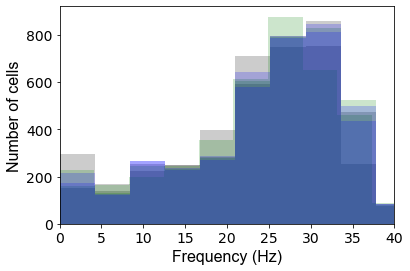

In [13]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,40)},
                         folder=folder, save=True)

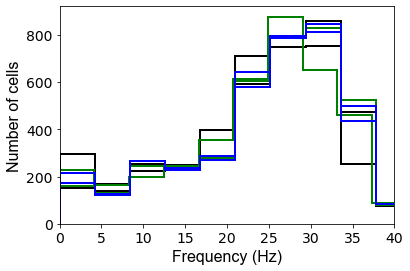

In [14]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency_step(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,40)},
                         folder=folder, save=True)

In [15]:
mean_frequency_dict = mean_frequency(dictionary=frequency_analysis_dict, parameters={"interval": [1,60]})

In [16]:
colors = {"0_p1": "black",
         "45_p1": "green",
         "90_p1": "blue",
         "0_p1_p2": "black",
         "45_p1_p2": "green" ,
         "90_p1_p2": "blue"}
bins=10

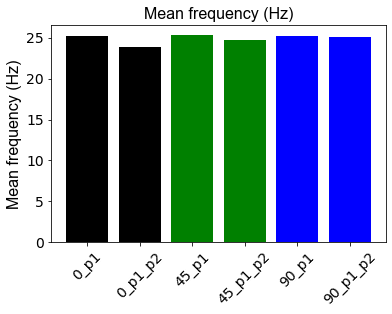

In [17]:
plot_mean_frequency(mean_frequency_dict = mean_frequency_dict, folder=folder,colors=colors, experiment_names=e)

In [18]:
parameters = dict(pairs=list())
for distance in [0,45,90]:
    parameters["pairs"].append([f"{distance}_p1", f"{distance}_p1_p2", f"{distance}"])
change = change_mean_frequency(dictionary=mean_frequency_dict, parameters=parameters)

In [19]:
colors = {"0": "black",
         "45": "green" ,
         "90": "blue"}

In [26]:
customize={plt.ylim:(-1.5,0)}

In [27]:
fig_name="SPN_response"

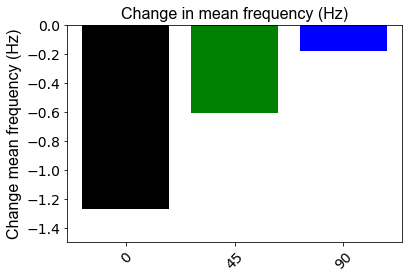

In [28]:
plot_change_mean_frequency(change_mean_frequency_dict = change, folder=folder,colors=colors, experiment_names=["0", "45", "90"], save=True,fig_name=fig_name,customize=customize)